### initialize

In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


### Read parquet files


In [21]:
# Replace with the actual path to your directory
us_path = "us_restaurants/*.parquet"
review_path = "output_file/*.parquet"


In [22]:
parquet_files_us = glob.glob(us_path)
# Read all the Parquet files and concatenate them into a single DataFrame
df1 = pd.concat([pd.read_parquet(file) for file in parquet_files_us])

In [23]:
parquet_files_review = glob.glob(review_path)
# Read all the Parquet files and concatenate them into a single DataFrame
df2 = pd.concat([pd.read_parquet(file) for file in parquet_files_review])

In [24]:
us_restaurants = df1


In [25]:
restaurants_reviews = df2

1. Distribution of Restaurants by Category


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1544569250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=us_restaurants,


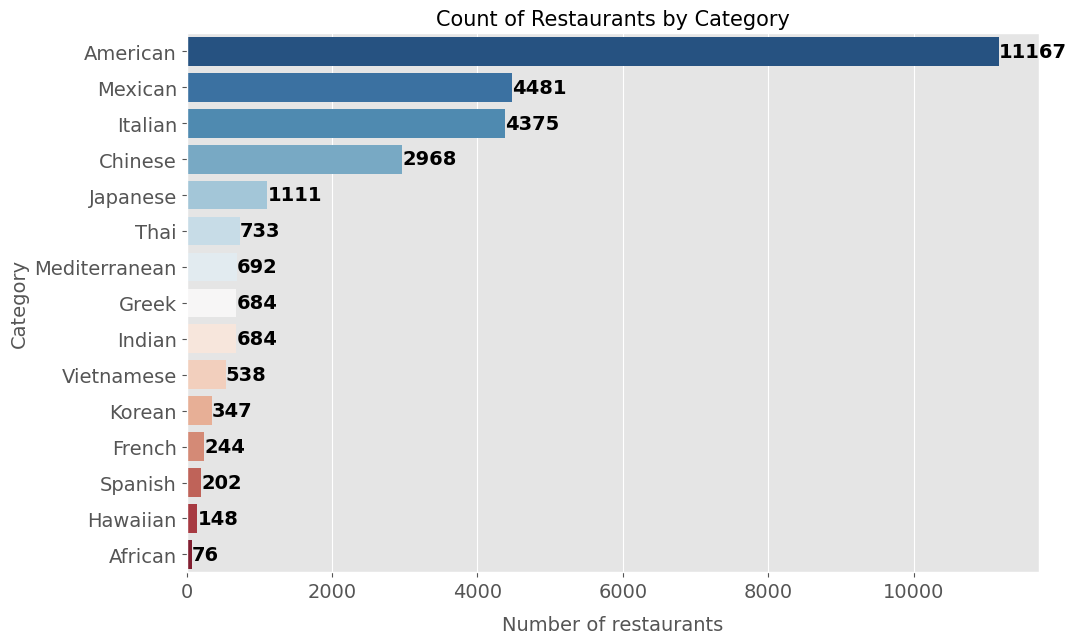

In [26]:
plt.style.use('ggplot')

plt.figure(figsize=(11,7))
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category', data=us_restaurants, 
              order=grouped.index, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)


2. Top 10 Cities with the Most Restaurants


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1104016392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))


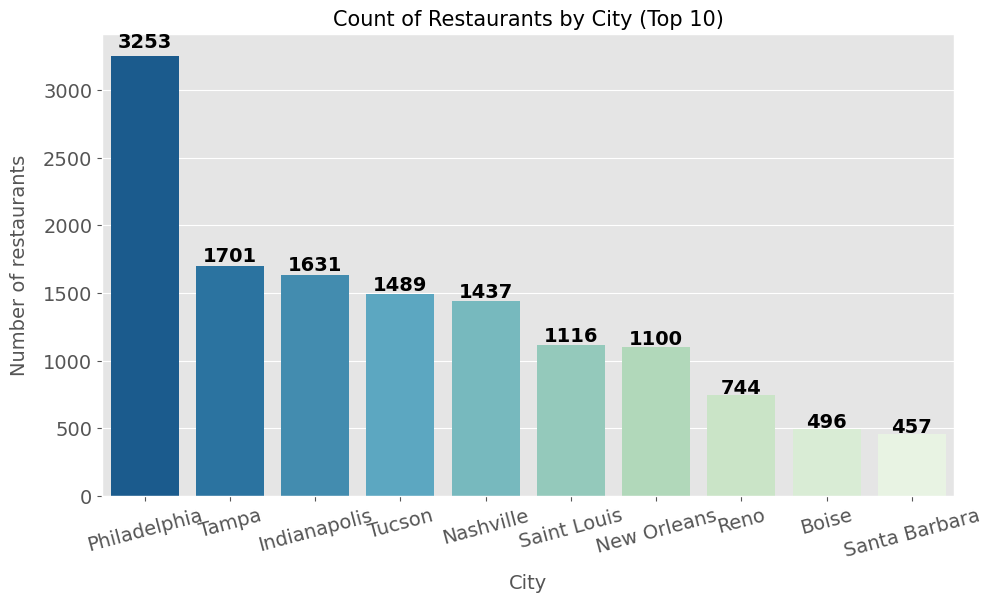

In [27]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for i, v in enumerate(grouped):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)


3. Distribution of Restaurants by State


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\2533176443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= grouped.index, y= grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))


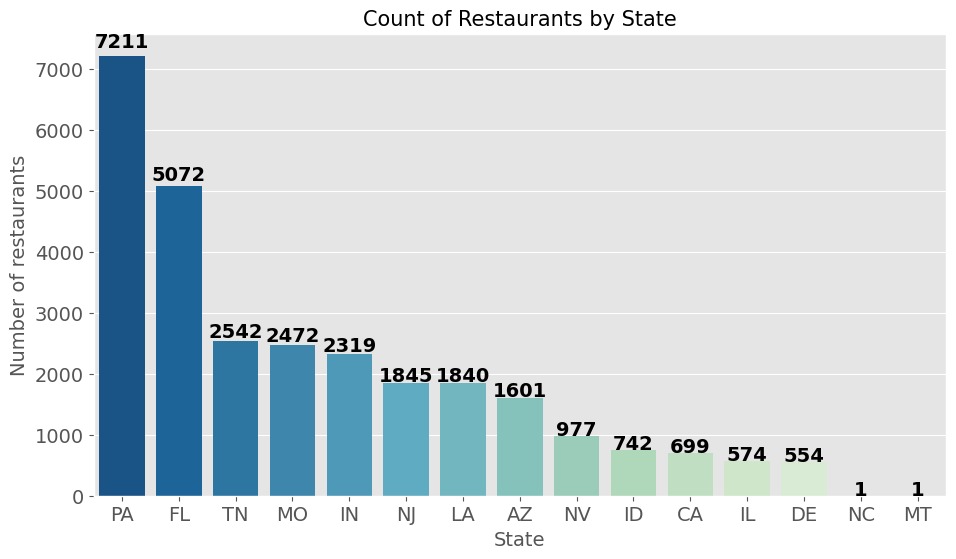

In [28]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(x= grouped.index, y= grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)


4. Distribution of Reviews by Cuisine Type


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\136437366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=grouped.index, x=grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))


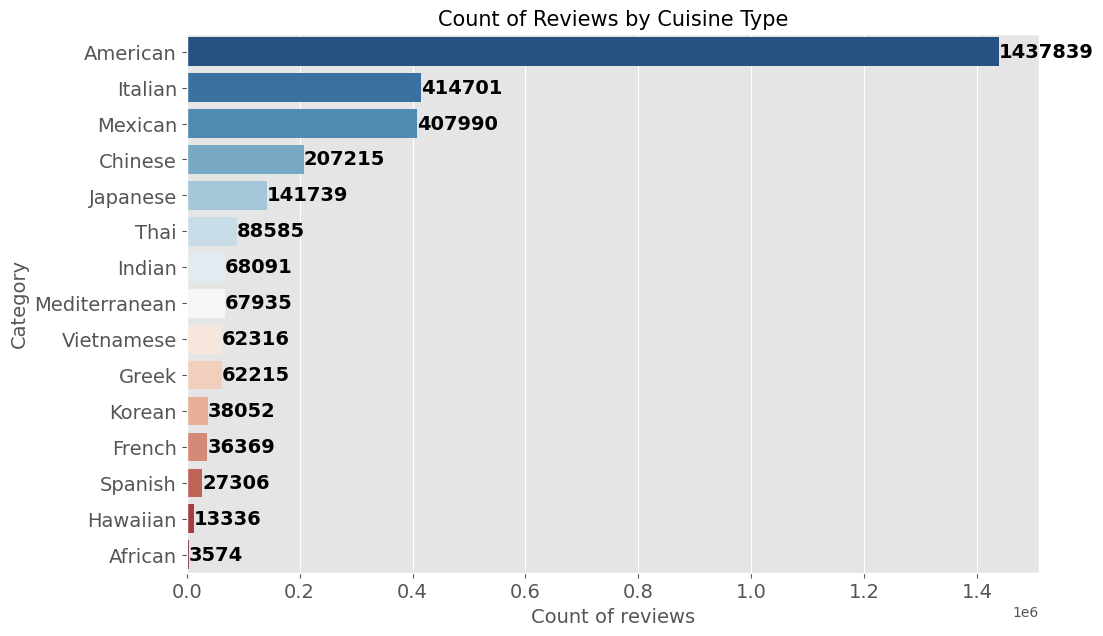

In [29]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending=False)
sns.barplot(y=grouped.index, x=grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i, v in enumerate(grouped):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)


5. Top 10 Cities with the Most Reviews


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\4089620779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))


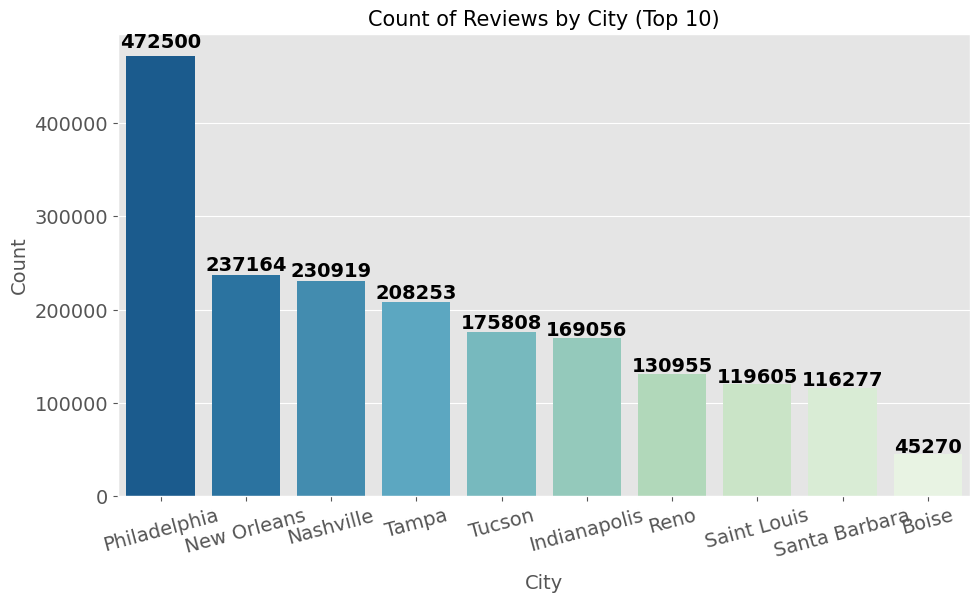

In [30]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(x= grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)


6. Top 9 Restaurants with the Most Reviews


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1323651418.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=grouped.review_count, y=grouped.name, palette="GnBu_r", ci=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1323651418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.review_count, y=grouped.name, palette="GnBu_r", ci=None)


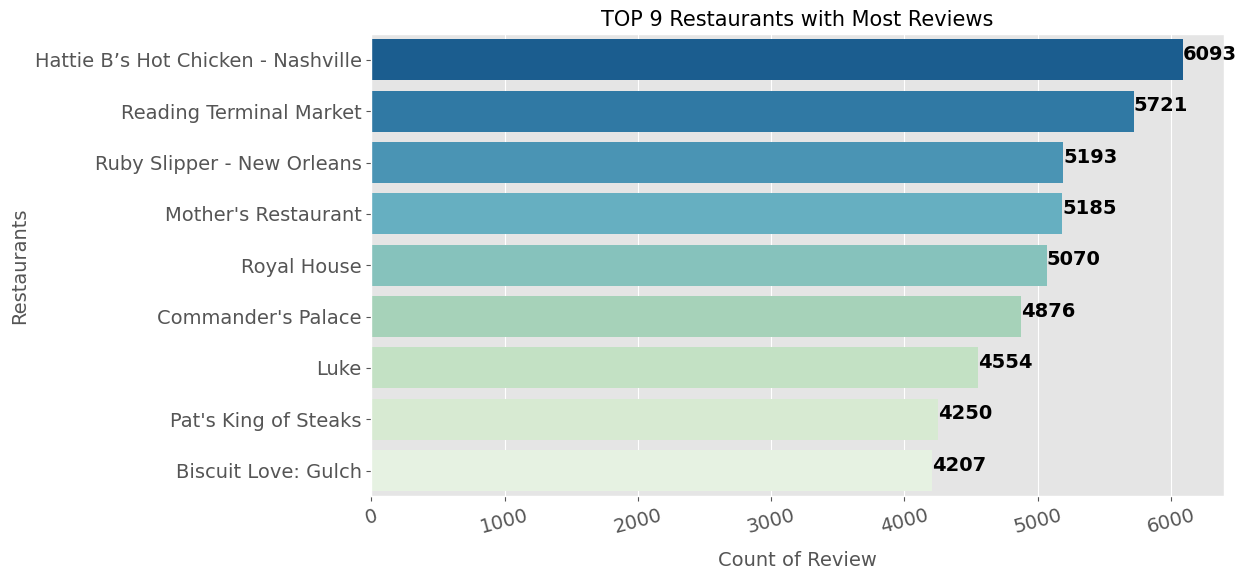

In [31]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y=grouped.name, palette="GnBu_r", ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)



C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1951140085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.review_count, y=grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), errorbar=None)


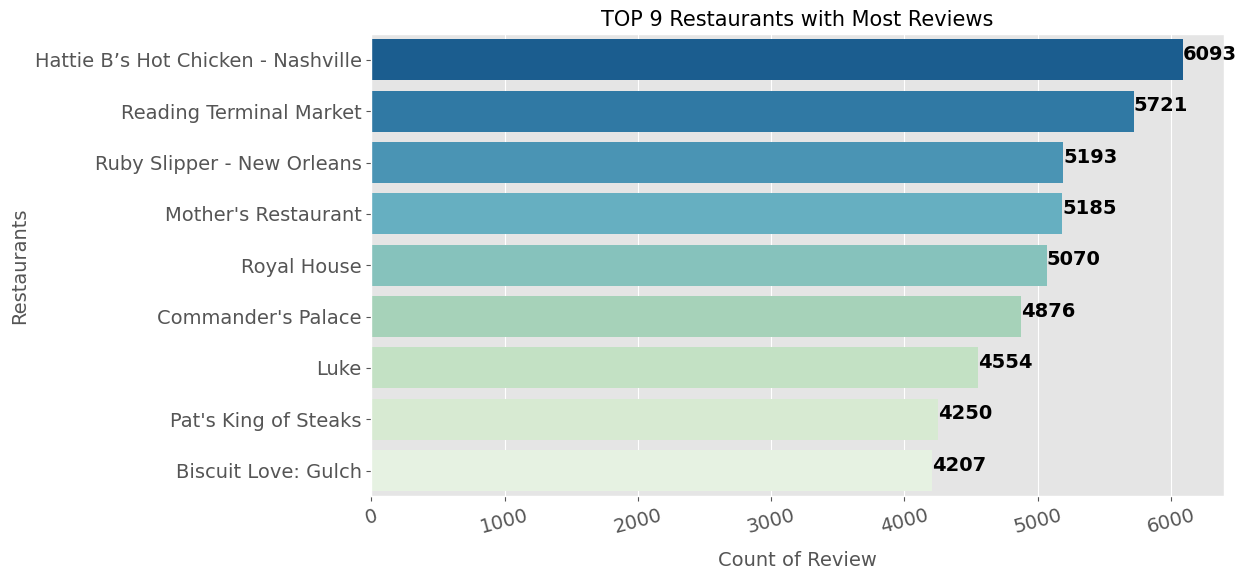

In [32]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y=grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), errorbar=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)


7. Distribution of positive and negative reviews in each category

In [33]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"], columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True, fill_value=0)
table_percentage = table.div(table.iloc[:, -1], axis=0).iloc[:-1, -2].sort_values(ascending=False)


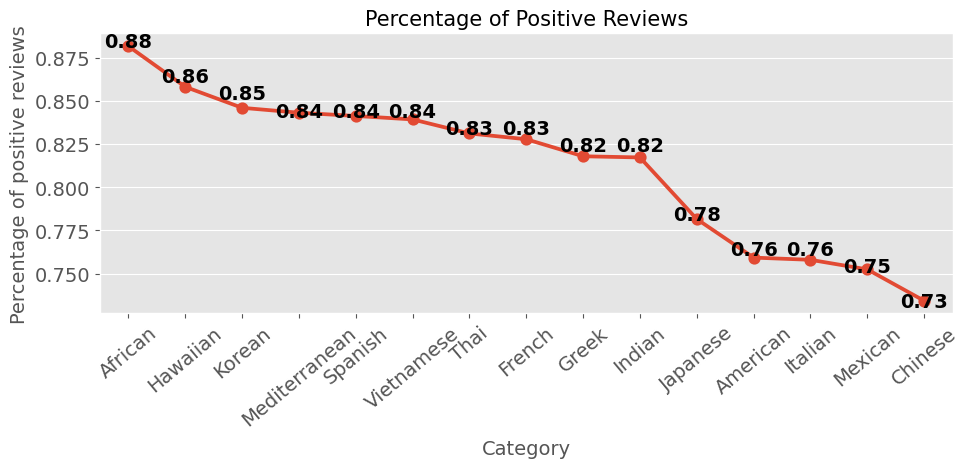

In [34]:
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y=table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)


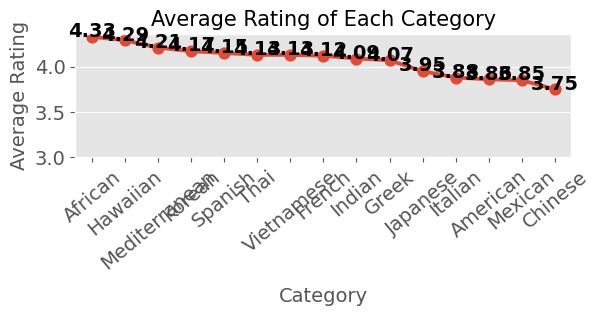

In [35]:
plt.subplot(212)
grouped = restaurants_reviews.groupby('category')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(x=grouped.index, y=grouped.values)
plt.ylim(3)
plt.xlabel('Category', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of Each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

plt.subplots_adjust(hspace=1)


8. Average Length of Reviews


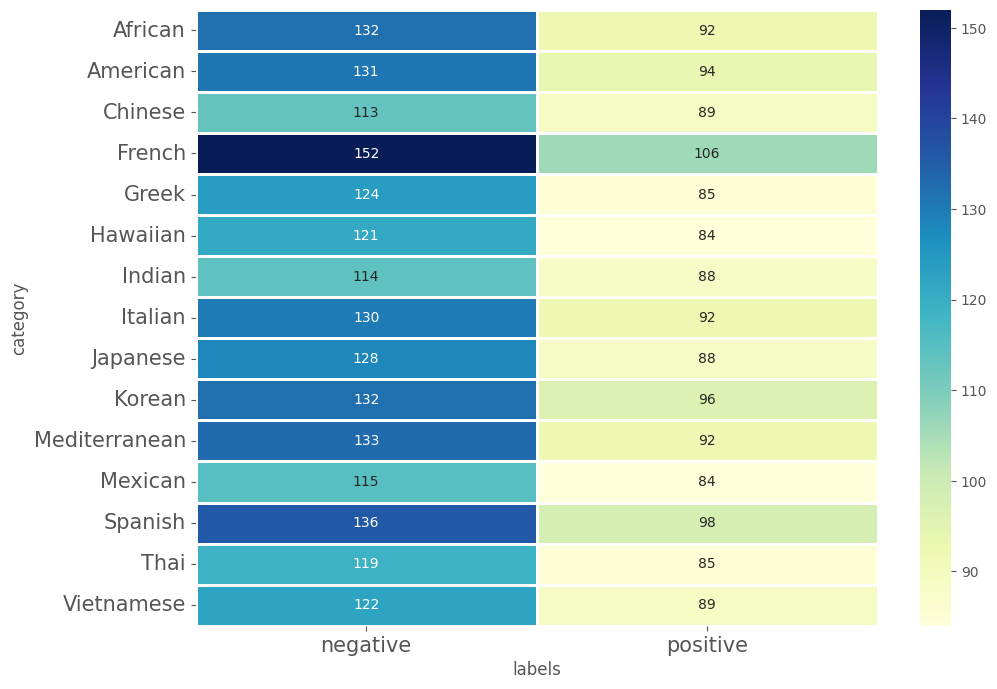

In [36]:
table = restaurants_reviews.groupby(['category', 'labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g', annot=True, linewidths=1)
plt.tick_params(labelsize=15)


9. Ratings Distribution


Distribution of Ratings by Restaurants


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\1112550088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index,y= grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))


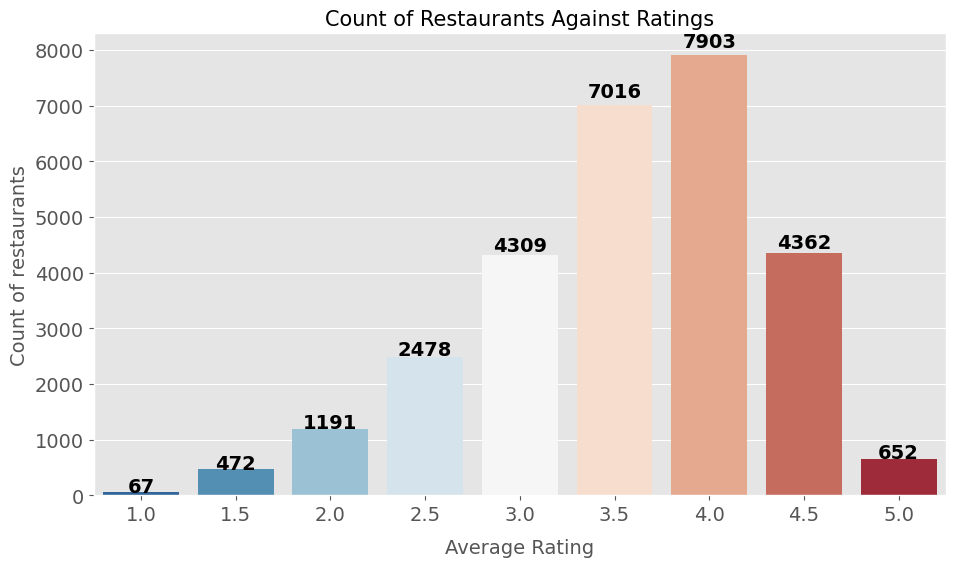

In [37]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.stars.value_counts().sort_index()
sns.barplot(x=grouped.index,y= grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants Against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)


Distribution of Ratings by Reviews


C:\Users\harsh\AppData\Local\Temp\ipykernel_28628\2290982775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))


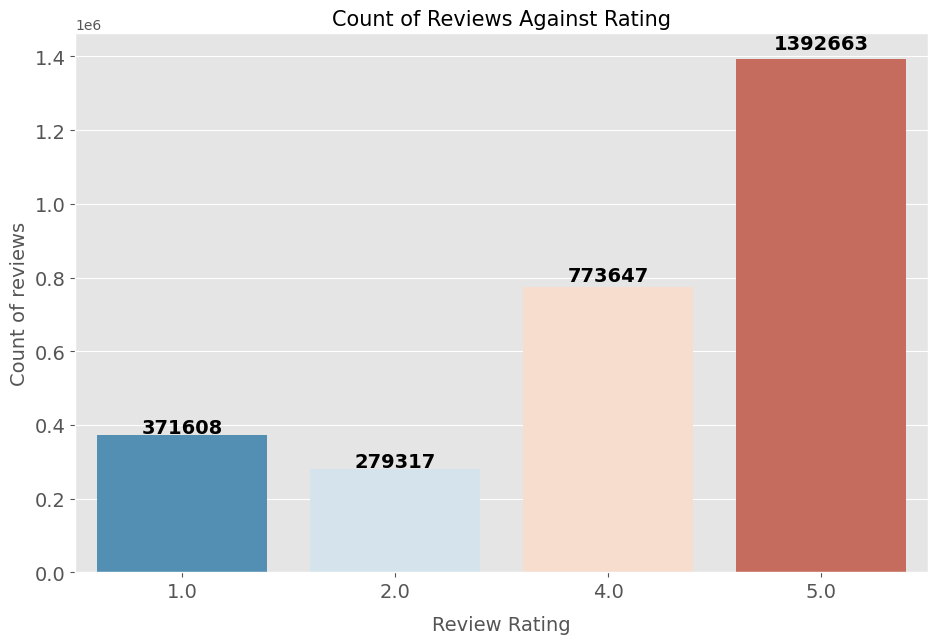

In [38]:
plt.figure(figsize=(11,7))
grouped = restaurants_reviews.review_star.value_counts().sort_index()
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews Against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)
